In [1]:
import json

with open('simulator_results.json', 'r') as f:
    sim_res = json.load(f)
    
print(len(sim_res))

18


In [2]:
with open('my_result.json', 'r') as f:
    my_res = json.load(f)
print(len(my_res))

206


In [3]:
my_res[0]

{'time': 0.018829822540283203,
 'output': [[0.0], [1.0], [0.0], [0.0], [0.0]],
 'Pods': [{'name': 'pod0', 'cpu': 9, 'mem': 4}],
 'Nodes': [{'name': 'node0', 'cpu': 245, 'mem': 213, 'pnum': 260},
  {'name': 'node1', 'cpu': 214, 'mem': 257, 'pnum': 293},
  {'name': 'node2', 'cpu': 286, 'mem': 235, 'pnum': 235},
  {'name': 'node3', 'cpu': 278, 'mem': 245, 'pnum': 214},
  {'name': 'node4', 'cpu': 227, 'mem': 214, 'pnum': 284}]}

In [13]:
mt = []
st = []
p = []
n = []
for r in sim_res:
    i = r['index']
    print(i)
    m = my_res[i]
    mt.append(m['time'])
    st.append(r['time'])
    p.append(len(m['Pods']))
    n.append(len(m['Nodes']))
#     print('my time:', m['time'], ", sim time:", r['time'])

0
1
2
3
4
5
6
7
49
50
51
52
98
99
100
101
157
158


In [14]:
p

[1, 2, 3, 4, 5, 6, 7, 8, 2, 4, 6, 8, 2, 4, 6, 8, 3, 6]

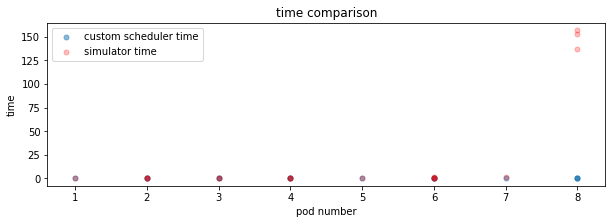

In [15]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('time comparison')
plt.scatter(p, mt,  s=25, alpha=.5, label='custom scheduler time')
plt.scatter(p, st, s = 25, c = 'red', alpha=.25, label='simulator time')
plt.xlabel('pod number')
plt.ylabel('time',rotation = 90)
plt.savefig('time_comparision.png')
plt.legend(loc='upper left')
plt.show()

In [16]:
'pod1'.split('pod')

['', '1']

In [47]:
import numpy as np

sr = []
mr = []

for r in sim_res:
    i = r['index']
#     print(i)
    res = r['result']
    m = my_res[i]
    pn = len(m['Pods'])
    nn = len(m['Nodes'])
    sm = np.zeros([nn, pn])
    for a in res:
        x = int(a[0].split('pod')[1])
        y = int(a[1].split('node')[1])
        sm[y][x] = 1.0
#     print((np.linalg.matrix_rank(sm)))
    sr.append(np.linalg.matrix_rank(sm))
    
    m_res  = np.array(m['output'])
#     print(my_res)
#     print(np.linalg.matrix_rank(m_res))
    mr.append(np.linalg.matrix_rank(m_res))
#     f = (my_res == sm)
#     print(f)

In [48]:
n

[5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 15, 15, 15, 15, 20, 20]

In [49]:
p

[1, 2, 3, 4, 5, 6, 7, 8, 2, 4, 6, 8, 2, 4, 6, 8, 3, 6]

In [60]:
sr

[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 1, 3]

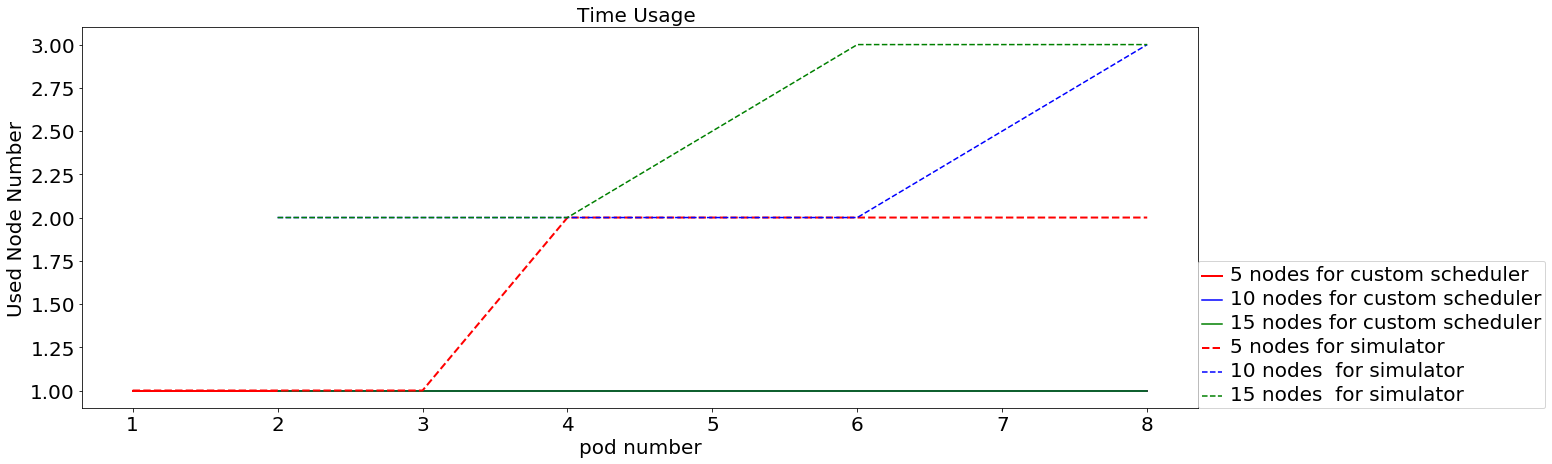

In [61]:
figure = plt.figure(figsize = (20,7))
plt.plot(p[0:8], mr[0:8], color = 'red', linewidth = 2, label = '5 nodes for custom scheduler')
plt.plot(p[8:12], mr[8:12], color = 'blue', linewidth = 1.5, label = '10 nodes for custom scheduler')
plt.plot(p[12:16], mr[12:16], color = 'green', linewidth = 1.5, label = '15 nodes for custom scheduler')
# plt.plot(p[16:18], mr[16:18], color = 'black', linewidth = 1.5, label = '20 nodes for custom scheduler')
plt.plot(p[0:8], sr[0:8], color = 'red', linestyle='--',linewidth = 2, label = '5 nodes for simulator')
plt.plot(p[8:12], sr[8:12], color = 'blue', linestyle='--',linewidth = 1.5, label = '10 nodes  for simulator')
plt.plot(p[12:16], sr[12:16], color = 'green',linestyle='--', linewidth = 1.5, label = '15 nodes  for simulator')
# plt.plot(p[16:18], sr[16:18], color = 'black', linewidth = 1.5, label = '20 nodes  for simulator')
plt.title('Time Usage ', fontsize=20)
plt.xlabel('pod number', fontsize=20)
plt.ylabel('Used Node Number',rotation = 90, fontsize=20)
# plt.legend(loc='upper right')
plt.legend(loc=(1,0), numpoints=1)

leg = plt.gca().get_legend()

ltext = leg.get_texts()
plt.tick_params(labelsize=20)
plt.setp(ltext, fontsize=20)
plt.savefig('all-in-one.png')
plt.show()

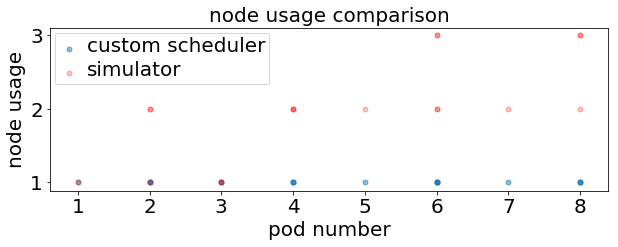

In [59]:
figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('node usage comparison', fontsize=20)
plt.scatter(p, mr,  s=25, alpha=.5, label='custom scheduler')
plt.scatter(p, sr, s = 25, c = 'red', alpha=.25, label='simulator')
plt.xlabel('pod number', fontsize=20)
plt.ylabel('node usage',rotation = 90, fontsize=20)
plt.savefig('node_usage_comparision.png')
# plt.legend(loc='upper left')
plt.legend(loc=0, numpoints=1)

leg = plt.gca().get_legend()

ltext = leg.get_texts()
plt.tick_params(labelsize=20)
plt.setp(ltext, fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

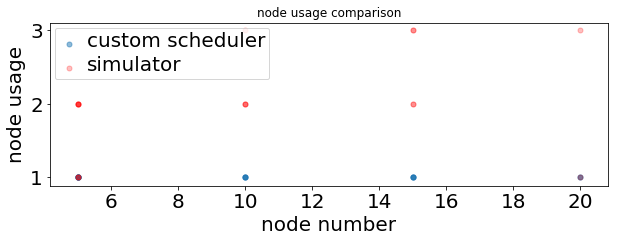

In [62]:
figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('node usage comparison')
plt.scatter(n, mr,  s=25, alpha=.5, label='custom scheduler')
plt.scatter(n, sr, s = 25, c = 'red', alpha=.25, label='simulator')
plt.xlabel('node number', fontsize=20)
plt.ylabel('node usage',rotation = 90, fontsize=20)
plt.savefig('node_usage_comparision.png')
# plt.legend(loc='upper left')
plt.legend(loc=0, numpoints=1)

leg = plt.gca().get_legend()

ltext = leg.get_texts()
plt.tick_params(labelsize=20)
plt.setp(ltext, fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [36]:

# sr = []
mr = []
node_num = []
pod_num = []

for m in my_res:
    pn = len(m['Pods'])
    nn = len(m['Nodes'])
    m_res  = np.array(m['output'])
#     print(my_res)
#     print(np.linalg.matrix_rank(m_res))
    mr.append(np.linalg.matrix_rank(m_res))
    pod_num.append(pn)
    node_num.append(nn)
#     f = (my_res == sm)

#     print(f)

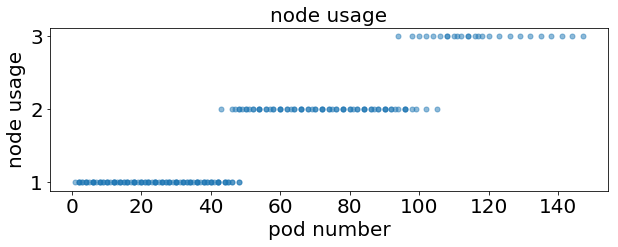

In [39]:
figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('node usage', fontsize=20)
plt.scatter(pod_num, mr,  s=25,alpha=.5, label='custom scheduler')
# plt.scatter(p, sr, s = 25, c = 'red', alpha=.25, label='simulator')
plt.xlabel('pod number', fontsize=20)
plt.ylabel('node usage',rotation = 90, fontsize=20)
plt.savefig('my_node_usage.png')
plt.tick_params(labelsize=20)
# plt.legend(loc='upper left')
plt.setp(ltext, fontsize=20)
plt.show()

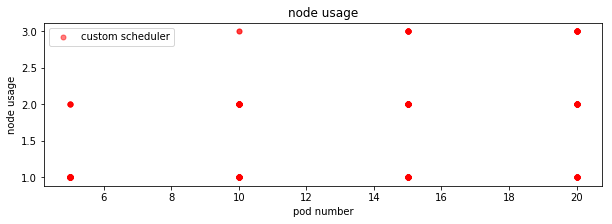

In [86]:
figure = plt.figure(figsize = (10,3))
# plt.plot(mt, st)
# plt.plot(p, mt, color = 'red', linewidth = 1.5, label = 'my')
# plt.plot(p, st, color = 'blue', linewidth = 1.5, label = 's')
plt.title('node usage')
plt.scatter(node_num, mr,  s=25,c = 'red',alpha=.5, label='custom scheduler')
# plt.scatter(p, sr, s = 25, c = 'red', alpha=.25, label='simulator')
plt.xlabel('pod number')
plt.ylabel('node usage',rotation = 90)
plt.savefig('my_node_usage.png')
plt.legend(loc='upper left')
plt.show()